In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
repository_url = "https://raw.githubusercontent.com/baertsch/FIN-429/main/"
# Revenues (annual frequency)
rev_y = pd.read_excel(repository_url+"DS_REV_USD_Y.xlsx")
# Return index (monthly frequency)
ri_m = pd.read_excel(repository_url+"DS_RI_USD_M.xlsx")
# Return index (annual frequency)
ri_y = pd.read_excel(repository_url+"DS_RI_USD_Y.xlsx")
# Scope 1
scope1 = pd.read_excel(repository_url+"Scope_1.xlsx")
# Scope 2
scope2 = pd.read_excel(repository_url+"Scope_2.xlsx")
# Market capitalization (monthly frequency)
mv_m = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")
# Market capitalization (annual frequency)
mv_y = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")


In [30]:
# Filter for European firms
european_countries = ["AT", "BE", "DK", "FI", "FR", "DE", "IE", "IT", "NL", 
                       "NO", "PT", "ES", "SE", "CH", "GB"]
def filter_europe(df, codes):
    df['Country Code']=df['ISIN'].str[:2]
    df = df[df['Country Code'].isin(codes)]
    return df
rev_y = filter_europe(rev_y,european_countries)
ri_m = filter_europe(ri_m,european_countries)
ri_y = filter_europe(ri_y,european_countries)
scope1 = filter_europe(scope1,european_countries)
scope2 = filter_europe(scope2,european_countries)
mv_m = filter_europe(mv_m,european_countries)
mv_y = filter_europe(mv_y,european_countries)


In [31]:
ri_y[ri_y[2024].isna()]

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Country Code
262,CREDIT SUISSE GROUP DEAD - DELIST.14/06/23,CH0012138530,866.29,1031.27,1200.08,889.35,530.03,1008.79,1082.91,1617.77,...,553.32,591.13,782.15,520.18,586.76,628.27,451.23,174.77,NaN,CH
383,LEONI DEAD - DELIST.21/08/23,DE0005408884,258.76,255.44,219.37,226.43,318.35,689.13,781.43,1088.78,...,1463.00,1699.28,3173.05,1430.19,542.21,683.30,500.01,163.81,NaN,DE
427,MCKESSON EUROPE DEAD - DELIST.15/06/23,DE000CLS1001,1746.06,1048.24,1118.57,1335.62,1311.11,1830.53,2682.78,3395.66,...,2545.73,2546.27,3160.82,2944.77,2957.03,3321.51,2921.93,2449.51,NaN,DE
479,MEDIASET ESPANA COMUNICACION,ES0152503035,NaN,NaN,NaN,NaN,NaN,NaN,206.06,261.81,...,163.03,204.85,196.18,125.79,107.58,108.34,90.53,68.59,NaN,ES
488,ZARDOYA OTIS DEAD - DELIST.09/05/22,ES0184933812,1163.48,740.14,967.08,1151.98,1700.52,2979.34,4379.48,4793.79,...,4961.09,4249.68,5704.73,4431.43,4327.99,4048.75,4924.46,NaN,NaN,ES
507,NELES DEAD - DELIST.01/04/22,FI4000440664,386.23,529.84,398.34,461.51,410.35,580.28,772.23,1488.46,...,2140.86,3162.36,3486.40,3524.17,4265.10,6019.12,6292.32,NaN,NaN,FI
523,CNP ASSURANCES DEAD - DELIST.20/06/22,FR0000120222,120.50,141.64,163.25,145.63,201.69,321.11,394.51,512.80,...,507.09,779.94,1095.55,1026.26,868.54,768.56,1301.16,NaN,NaN,FR
562,EDF DEAD - DELIST.08/06/23,FR0010242511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.88,...,65.35,51.89,78.28,107.76,82.00,84.60,65.43,94.58,NaN,FR
584,TED BAKER DEAD - DELIST.24/10/22,GB0001048619,149.19,493.75,259.43,326.06,300.96,661.53,879.85,887.74,...,5516.47,4570.66,5491.27,3205.51,568.69,261.64,191.29,NaN,NaN,GB
591,BREWIN DOLPHIN DEAD - DELIST.28/09/22,GB0001765816,608.89,1321.94,1226.22,586.55,238.34,878.08,1230.89,1609.88,...,3003.29,3284.97,4535.99,3603.99,4569.31,4112.75,4800.27,NaN,NaN,GB


In [32]:
rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_m.iloc[:,2:-1] = ri_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_y.iloc[:,2:-1] = ri_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope1.iloc[:,2:-1] = scope1.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope2.iloc[:,2:-1] = scope2.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_m.iloc[:,2:-1] = mv_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_y.iloc[:,2:-1] = mv_y.iloc[:,2:-1].fillna(method='ffill', axis=1)

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/3426345851.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/3426345851.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/3426345851.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4              NaN
5         305807.0
6              NaN
7        3234567.0
8        36413

# Question 1
We take all our data, so all european firms
Then for question 2 and onward we take all european firms with carbon data

In [44]:

# Assuming ri_m is your DataFrame
# Convert column names to datetime
ri_m.columns = pd.to_datetime(ri_m.columns, errors='coerce')

# Function to check available years for each row
def check_available_years(row):
    available_years = row.dropna().index.year
    return available_years.unique()

# Apply the function to each row
available_years_per_row = ri_m.apply(check_available_years, axis=1)

# Print the available years for each row
for index, years in available_years_per_row.items():
    print(f"Row {index} has data available for years: {years.tolist()}")

Row 4 has data available for years: [nan, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0]
Row 5 has data available for years: [nan, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0]
Row 6 has data available for years: [nan, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0]
Row 7 has data available for years: [nan, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0]
Row 8 has data available for years: [nan, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0

In [33]:
def compute_returns(df):
    data = df.set_index("ISIN").drop(columns=["Country Code", "NAME"]).T
    returns = data.apply(lambda row: row[row.first_valid_index():].pct_change(), axis=1).T # Apply pct_change starting from the first non-NaN value onward for each row
    return returns

monthly_returns = compute_returns(ri_m)
monthly_returns

# Compute Annualized Returns and Volatility
def annualized_stats(returns):
    mean_return = np.mean(returns, axis=1) * 12  # Annualized Return
    volatility = np.std(returns, axis=1) * np.sqrt(12)  # Annualized Volatility
    return mean_return, volatility

annualized_return, annualized_volatility = annualized_stats(monthly_returns)

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/1900171289.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.apply(lambda row: row[row.first_valid_index():].pct_change(), axis=1).T # Apply pct_change starting from the first non-NaN value onward for each row
/Users/nadegelan/MGT-502/.conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [34]:
stats_df = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility
})

In [39]:
# Take a return of 0 for infinite values
stats_df.replace([np.inf, -np.inf], 0, inplace=True)

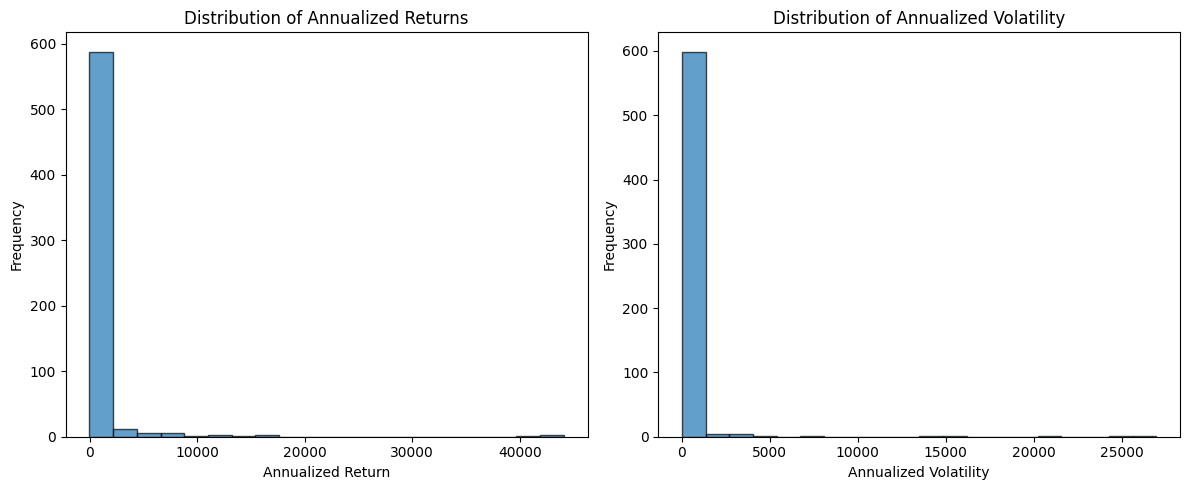

In [40]:
# Plot Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(stats_df["Annualized Return"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Annualized Return")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Returns")

plt.subplot(1, 2, 2)
plt.hist(stats_df["Annualized Volatility"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Annualized Volatility")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Volatility")

plt.tight_layout()
plt.show()